In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("A2.csv")
df.head()

,maths score,writing score,reading score,placement score,clubjoining,placementoffercount
0,77.0,94.0,68.0,81.0,22.0,3.0
1,75.0,93.0,62.0,92.0,23.0,3.0
2,65.0,84.0,77.0,NaN,34.0,2.0
3,98.0,99.0,75.0,97.0,NaN,3.0
4,66.0,75.0,62.0,94.0,26.0,2.0


In [3]:
df.shape

(29, 6)

In [4]:
df.dtypes

maths score            float64
writing score          float64
reading score          float64
placement score        float64
clubjoining            float64
placementoffercount    float64
dtype: object

In [5]:
df.isna().sum()

maths score            3
writing score          3
reading score          1
placement score        3
clubjoining            2
placementoffercount    4
dtype: int64

In [6]:
cols_with_na = []
for col in df.columns:
    if df[col].isna().any():
        cols_with_na.append(col)

cols_with_na

['maths score',
 'writing score',
 'reading score',
 'placement score',
 'clubjoining',
 'placementoffercount']

In [7]:
for col in cols_with_na:
    col_dt = df[col].dtypes
    if (col_dt == 'int64' or col_dt == 'float64'):
        outliers = (df[col] < 0) | (100 < df[col])
        df.loc[outliers, col] = np.nan
        df[col] = df[col].fillna(df[col].mean())
    else:
        df[col] = df[col].fillna(method='ffill')
df.head()

,maths score,writing score,reading score,placement score,clubjoining,placementoffercount
0,77.0,94.0,68.0,81.000000,22.000000,3.0
1,75.0,93.0,62.0,92.000000,23.000000,3.0
2,65.0,84.0,77.0,87.230769,34.000000,2.0
3,98.0,99.0,75.0,97.000000,49.148148,3.0
4,66.0,75.0,62.0,94.000000,26.000000,2.0


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

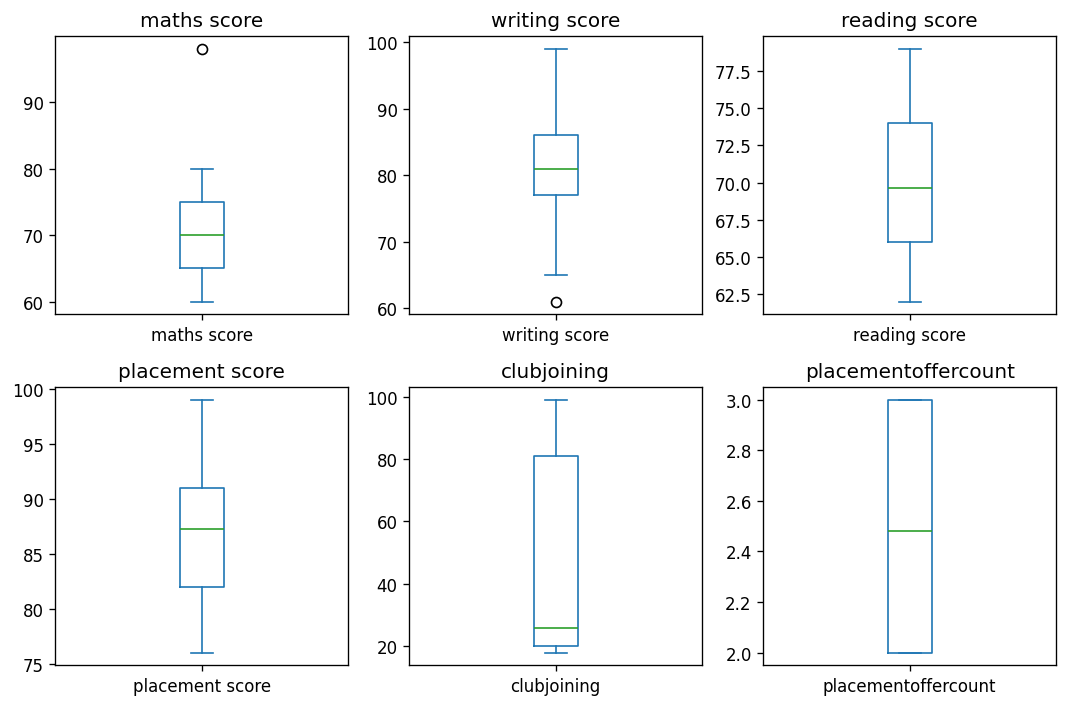

In [9]:
df_list = ['maths score', 'writing score', 'reading score',
           'placement score', 'clubjoining', 'placementoffercount']
fig, axes = plt.subplots(2, 3, figsize=(9, 6), dpi=120)

for i, ax in enumerate(axes.flat):
    if i < len(df_list):
        df[df_list[i]].plot(kind='box', ax=ax)
        ax.set_title(df_list[i])
    else:
        ax.axis('off')

plt.tight_layout() 
plt.show()

In [10]:
Q1 = df['writing score'].quantile(0.25)
Q3 = df['writing score'].quantile(0.75)
IQR = Q3 - Q1

Lower_limit = Q1 - 1.5 * IQR
Upper_limit = Q3 + 1.5 * IQR

print(f'Q1 = {Q1}, Q3 = {Q3}, IQR = {IQR}, Lower_limit = {Lower_limit}, Upper_limit = {Upper_limit}')

Q1 = 77.0, Q3 = 86.0, IQR = 9.0, Lower_limit = 63.5, Upper_limit = 99.5


In [11]:
df[(df['writing score'] < Lower_limit) | (df['writing score'] > Upper_limit)]

,maths score,writing score,reading score,placement score,clubjoining,placementoffercount
24,62.0,61.0,76.0,89.0,93.0,3.0


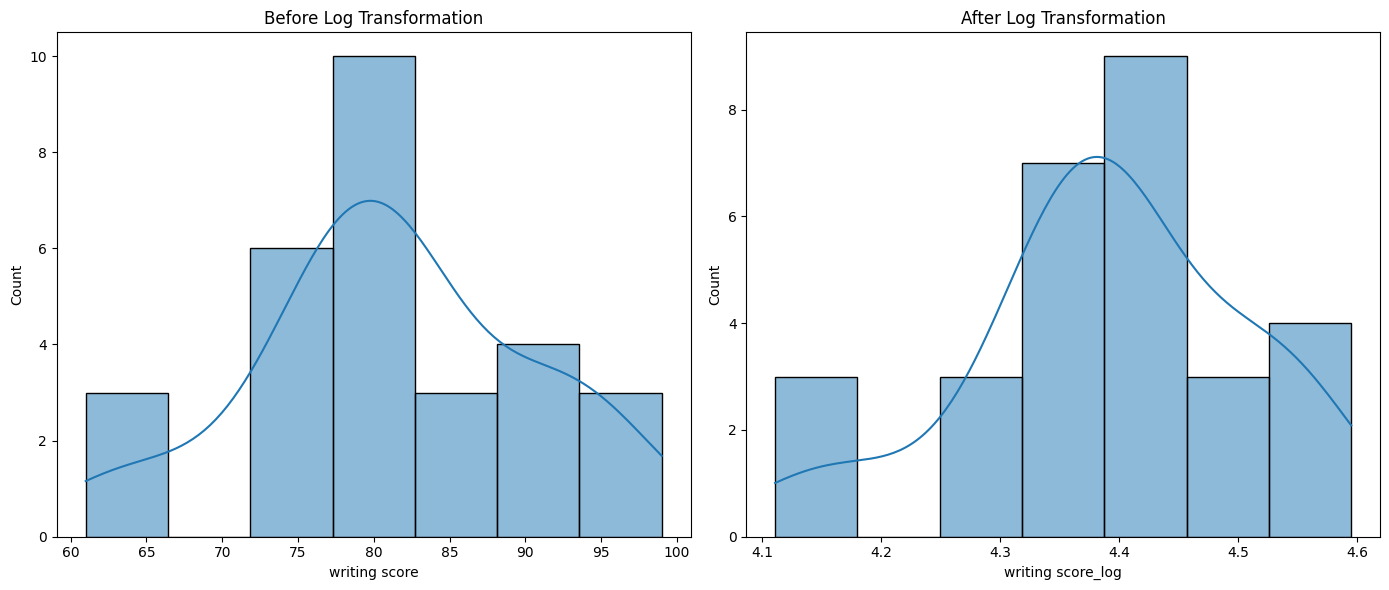

In [12]:
df['writing score_log'] = np.log(df['writing score'])
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(data=df, x="writing score", ax=axes[0], kde=True)
sns.histplot(data=df, x="writing score_log", ax=axes[1], kde=True)

axes[0].set_title('Before Log Transformation')
axes[1].set_title('After Log Transformation')

plt.tight_layout()
plt.show()

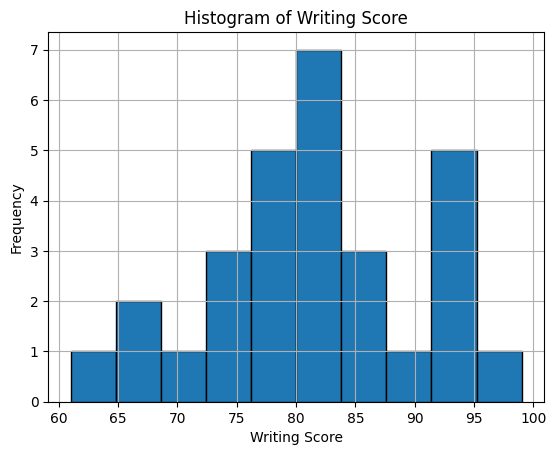

In [13]:
df['writing score'].plot.hist(bins=10, edgecolor='black')  
plt.title('Histogram of Writing Score')
plt.xlabel('Writing Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()